### Clustering with PSO

##### Import Statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

##### Cluster Algorithm with K-Means

In [2]:
def cluster( image, k):
    # height and width of image
    h, w, _ = image.shape

    # reshape image into matrix
    X = image.reshape( ( h * w, 3))

    # initiate KMeans
    kmeans = KMeans( n_clusters=k, n_init="auto")

    # fit to image matrix
    kmeans.fit( X)

    # labels of each pixels
    value = kmeans.labels_

    # location of centers
    centers = kmeans.cluster_centers_

    # generate new image matrix based on labels and centers
    new_X = np.array( [ np.uint8( centers[ c]) for c in value])

    # reshape new image matrix into proper image
    new_image = new_X.reshape( image.shape)

    return new_image

##### Euclidean Distance Function (Used in Fitness Function)

In [3]:
# euclidean distance between two points a and b
def euc( a, b):
	return np.sum( [ ( a[ i] - b[ i]) ** 2 for i in range( len( a))]) ** 0.5

##### Fitness Function

In [4]:
# X: image matrix
# p: loaction of particle
def pso_cluster_fit( X, p):
	# number of pixels
	n = X.shape[ 0]

	# number of clusters
	k = int( p.shape[ 0] / 3)

	# centers
	centers = p.reshape( ( 3, k)).T

	# labels for each pixel
	labels = np.zeros( n)

	# distance between of each pixel with each cluster
	dists = np.zeros( ( n, k))

	# for each cluster
	for i in range( k):
		# calculate distance between pixels and cluster
		dists[:,i] = np.sum( ( X - centers[ i]) ** 2, axis=1) ** 0.5

	# nearest cluster number as label of pixel
	labels = dists.argmin( axis=1)

	# nearest cluster distance
	min_dist = dists.min( axis=1)

	# value of fitness function
	f = min_dist.sum()

	return f, labels, centers

##### PSO Cluster Function

In [5]:
def pso_cluster( image, k):
	# height and width of image
	h, w, _ = image.shape

	# reshaping image into matrix
	X = image.reshape( ( h * w, 3))

	# number of pixels
	n = X.shape[ 0]

	# inertia weight
	w = 0.7

	# cognitive coefficient
	c1 = 1

	# global coefficient
	c2 = 1

	# dimensions
	d = k * 3

	# number of particles
	pn = d

	# maximum range of search space for each dimension
	domain = 255

	# number of iteration
	n_iter = 100

	# location of particles. initial seed within [ 0, domain]
	p = domain * np.random.rand( pn, d)
	
	# initial velocity
	v = np.zeros( ( pn, d))

	# best location of particle initiated with p ( initial location)
	pbest = np.copy( p)

	# value of fit function for each particle
	f = np.array( [ pso_cluster_fit( X, particle)[ 0] for particle in p])

	# best value of fit function for each particle
	# initiated with f ( initial value of fit function for each particle)
	fpbest = np.copy( f)

	# best value of fit function among all particles
	# and its corresponding location
	fgbest, gbest = f.min(), p[ f.argmin()]

	# variable for recording history of fgbest (best value of fit function)
	history = np.zeros( n_iter)

	# iterate n_iter time
	for i in range( n_iter):

		# recording best value of fit function
		history[ i] = fgbest

		# for each particle
		for j in range( pn):

			# for each dimension
			for k in range( d):
				# generate two random numbers in range [ -1, 1]
				r1, r2 = np.random.rand( 2)
				
				# calculate velocity of particle
				v[ j][ k] = ( w * v[ j][ k]) + ( r1 * c1 * ( pbest[ j][ k] - p[ j][ k])) + ( r2 * c2 * ( gbest[ k] - p[ j][ k]))

				# update location of particle
				p[ j][ k] = p[ j][ k] + v[ j][ k]

				if p[ j][ k] < 0:
					p[ j][ k] = 0
				if p[ j][ k] > 255:
					p[ j][ k] = 255

		# for each particle
		for j in range( pn):
			# calculate value of fit function for new location
			f[ j] = pso_cluster_fit( X, p[ j])[ 0]

			# if new value of particle is better than the best value of it
			if f[ j] < fpbest[ j]:
				# update best value of particle
				fpbest[ j] = f[ j]
				# update best location of particle
				pbest[ j] = p[ j]
		
		if f.min() < fgbest:
		# update best value and its corresponding location
			fgbest, gbest = f.min(), p[ f.argmin()]

	# acquire labels and centers from gbest
	_, value, centers = pso_cluster_fit( X, gbest)

	# generate new image matrix based on labels and centers
	new_X = np.array( [ np.uint8( centers[ c]) for c in value])

    # reshape new image matrix into proper image
	new_image = new_X.reshape( image.shape)

	return new_image, history, fgbest, value, centers


##### Driver

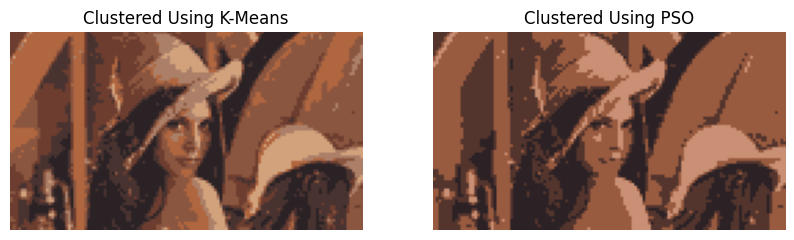

In [6]:
IMG_PATH = "IMG/lena.jpg"
IMG_SIZE = ( 128, 72)

img = np.array( Image.open( IMG_PATH).resize( IMG_SIZE))

img_clustered1 = cluster( img, 7)
img_clustered2, history, _, __, ___ = pso_cluster( img, 7)

fig = plt.figure( figsize=( 10, 10))

fig.add_subplot( 1, 2, 1)
plt.title( "Clustered Using K-Means")
plt.imshow( img_clustered1)
plt.axis( "off")

fig.add_subplot( 1, 2, 2)
plt.title( "Clustered Using PSO")
plt.imshow( img_clustered2)
plt.axis( "off")

plt.show()